In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [80]:
M = 300 # num agents
T = 20 # timesteps
R = 0.2 # confidence bound


In [81]:
x = np.random.rand(M) # init all agents to [0,1]

In [82]:
def get_A(x):
    X = np.array([x]*M)
    mask = abs(X - X.T) < R
    A = np.zeros(M)
    for i in range(M):
        A[i] = np.mean(x[mask[i]])
    return(A)

In [83]:
X = np.zeros((T,M))

X[0,:] = x

for t in range(T-1):
    X[t+1,:] = get_A(X[t,:])
X

array([[0.55168169, 0.62801194, 0.69252002, ..., 0.60530867, 0.58503264,
        0.26576502],
       [0.54815309, 0.62359192, 0.6881136 , ..., 0.60135362, 0.57627516,
        0.25571122],
       [0.54123382, 0.61528218, 0.70596789, ..., 0.58849729, 0.56040273,
        0.24804627],
       ...,
       [0.68194473, 0.68194473, 0.68194473, ..., 0.68194473, 0.68194473,
        0.29989649],
       [0.68194473, 0.68194473, 0.68194473, ..., 0.68194473, 0.68194473,
        0.29989649],
       [0.68194473, 0.68194473, 0.68194473, ..., 0.68194473, 0.68194473,
        0.29989649]], shape=(20, 300))

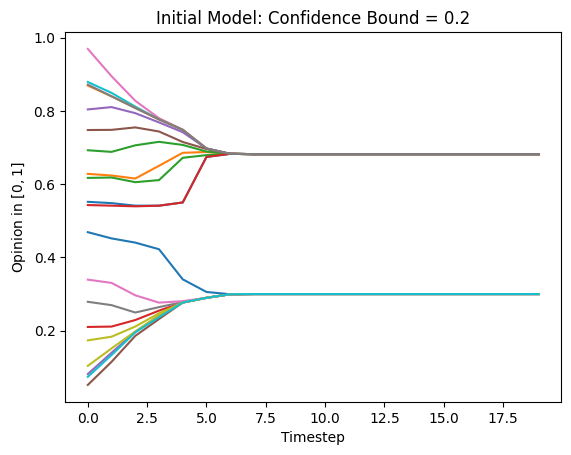

In [84]:
for i in range(T):
    plt.plot(X[:,i])
plt.title(f'Initial Model: Confidence Bound = {R}')
plt.xlabel('Timestep')
plt.ylabel('Opinion in $[0,1]$')
plt.show()
